In [2]:
import os
import sys
import argparse
from os.path import dirname, realpath


In [3]:
sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))

In [2]:
%run load_Results_12_15b.py

In [343]:
wts01 = np.where(gold1 == 1, 1/(np.mean(gold0)* (1-mp1) **.5), 1/ mp1**.5)
wts02 = np.where(gold2 == 1, 1/(np.mean(gold0)* (1-mp2) **.5), 2/ mp2**.5)
wts03 = np.where(gold3 == 1, 1/(np.mean(gold0)* (1-mp3) **.5), 3/ mp3**.5)
wts04 = np.where(gold4 == 1, 1/(np.mean(gold0)* (1-mp4) **.5), 4/ mp4**.5)


wt00 = np.where(gold0 == 1, 1/.064, 1)

# this is best so far,.default 
 

In [497]:

wts01 = np.where(gold1 == 1, 1/np.mean(gold1), 1/(1-np.mean(gold1)))
wts02 = np.where(gold2 == 1, 1/np.mean(gold2), 2/(1-np.mean(gold2)))
wts03 = np.where(gold3 == 1, 1/np.mean(gold3), 3/(1-np.mean(gold3)))
wts04 = np.where(gold4 == 1, 1/np.mean(gold4), 4/(1-np.mean(gold4)))

In [521]:
wts01 = np.where(gold1 == 1, 1/(np.mean(gold1)* (1-mp1) ), 1/ mp1)
wts02 = np.where(gold2 == 1, 2/(np.mean(gold2)* (1-mp2) ), 2/ mp2)
wts03 = np.where(gold3 == 1, 3/(np.mean(gold3)* (1-mp3) ), 3/ mp3)
wts04 = np.where(gold4 == 1, 4/(np.mean(gold4)* (1-mp4) ), 4/ mp4)


In [522]:
wts1234 = np.concatenate((wts01,wts02, wts03, wts04))
y1234 = np.concatenate((gold1,gold2, gold3, gold4))
lo1234 = logit( np.concatenate((mp1,mp2, mp3, mp4)) )
tlo1234 = logit( np.concatenate((tp1,tp2, tp3, tp4)) )
ti = np.concatenate((np.ones(len(mp1)), 2*np.ones(len(mp2)), 3*np.ones(len(mp3)), 4*np.ones(len(mp4))))
tti = np.concatenate((np.ones(len(tp1)), 2*np.ones(len(tp2)), 3*np.ones(len(tp3)), 4*np.ones(len(tp4))))

In [523]:
def weighted_temp2_scaling (logits, y, wts):
    def temperature_obj(t):
        temp_logits =   (logits  ) /  t [0]  + t[1]
        probs = expit(temp_logits)
        return log_loss(y, probs, sample_weight=wts)    
    res = minimize (temperature_obj,x0 = [.1,.1])
    return res.x
def temp_pred2 (alpha,  test_logit):    
    logi =  (test_logit  )/ alpha[0]    + alpha[1]
    proba = expit ( logi   ) #*tt.x[5]    
    return proba

In [524]:
alpha_0_1234  = weighted_temp2_scaling(  lo1234 , y1234,  wts1234)


In [525]:
pc = temp_pred2(alpha_0_1234, lo1234 )

(array([25169.,  9581.,  6283.,  4771.,  3128.,  2049.,  1454.,   791.,
          278.,    55.]),
 array([0.00389549, 0.09323184, 0.1825682 , 0.27190455, 0.36124091,
        0.45057726, 0.53991362, 0.62924997, 0.71858633, 0.80792269,
        0.89725904]),
 <BarContainer object of 10 artists>)

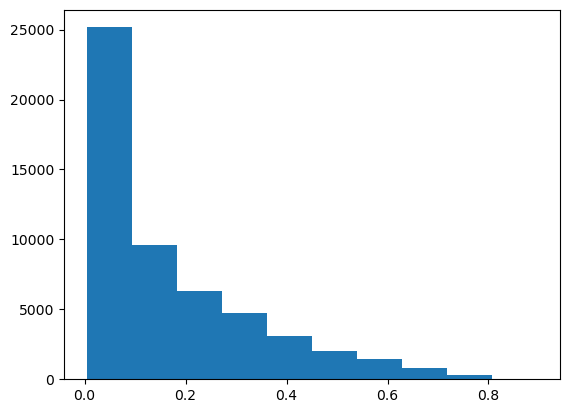

In [526]:
plt.hist(pc)

In [527]:
wp1 = ( pc [ti==1])**1
wp2 = ( pc [ti==2]) **1
wp3 = ( pc [ti==3]) **1
wp4 =  (pc [ti==4])**1
np1 =  ((1-pc) [ti==1])**1
np2 =  ((1-pc) [ti==2])**1
np3 =  ((1-pc) [ti==3])**1
np4 =  ((1-pc) [ti==4])**1

In [573]:
wts1 = np.where(gold1 == 1, 1/( np1 *np.mean(gold1)), 1/wp1)
wts2 = np.where(gold2 == 1, 1/( np2 *np.mean(gold2)), 1/wp2)
wts3 = np.where(gold3 == 1, 1/( np3 *np.mean(gold3)), 1/wp3 )
wts4 = np.where(gold4 == 1, 1/( np4 *np.mean(gold4)), 1/wp4 )

In [574]:
def temperature_multi_w(l1, l2,l3,l4, y1, y2, y3, y4, w1, w2, w3, w4):
    def temperature_obj(t):
        logi_1 = (l1* t[5]  +  t[1])  
        logi_2 = (l2 * t[6]  +  t[2])  
        logi_3 = (l3 * t[7] +  t[3])  
        logi_4 = (l4 * t[8] +  t[4])  
        
        p1  = expit (t[0] * logi_1  )  
        p2  = expit (t[0] *  logi_2  )  
        p3  = expit (t[0] *  logi_3  )  
        p4  = expit (t[0] * logi_4  ) 
        total_loss=log_loss(y1,p1,sample_weight=w1)+log_loss(y2,p2,sample_weight=w2)+log_loss(y3,p3,sample_weight=w3)+log_loss(y4,p4,sample_weight=w4)        
        return   total_loss
    r = minimize (temperature_obj, x0 = [.1, .1, .1,.1, 
                                         .1, .1,.1, .1, .1  ] )    
    return  r

In [575]:
tt  = temperature_multi_w( logit(mp1), logit(mp2), logit(mp3), logit(mp4),
                          gold1, gold2, gold3, gold4, wts1, wts2, wts3, wts4  )

In [576]:
tt['message']

'Optimization terminated successfully.'

In [577]:
def temp_pred  ( j1,j2, test_logit):    
    logi =  ( test_logit * j2    + j1    )  
    proba = expit (  logi * tt.x[0]  )  
    return proba

In [578]:
cal_1 = temp_pred(tt.x[1],tt.x[5], logit(tp1) )
cal_2 = temp_pred(tt.x[2],tt.x[6], logit(tp2) )
cal_3 = temp_pred(tt.x[3],tt.x[7], logit(tp3) )
cal_4 = temp_pred(tt.x[4],tt.x[8], logit(tp4) )

y1, p1 = calibration_curve(M_test1['golds'], cal_1 , n_bins = 400)
y2, p2 = calibration_curve(M_test2['golds'], cal_2 , n_bins = 400)
y3, p3 =calibration_curve(M_test3['golds'], cal_3 , n_bins = 250)
y4, p4 = calibration_curve(M_test4['golds'], cal_4 , n_bins = 250)

In [579]:
p4_ = p4 [y4>0]
y4_ = y4 [y4>0]
p3_ = p3 [y3>0]
y3_ = y3 [y3>0]
p2_ = p2 [y2>0]
y2_ = y2 [y2>0]
p1_ = p1 [y1>0]
y1_ = y1 [y1>0]

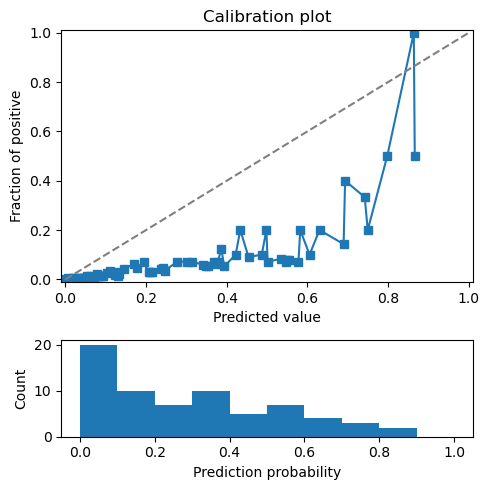

In [580]:
plotter(p4_, y4_)

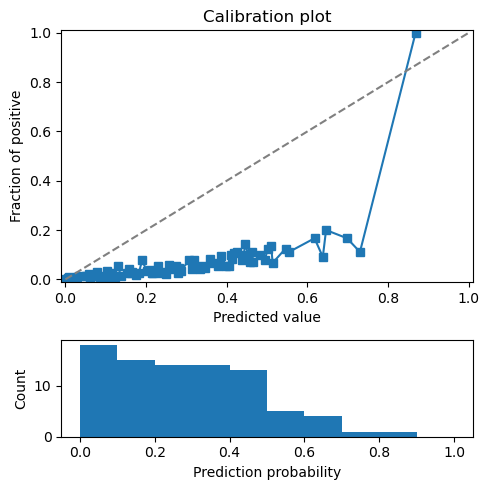

In [581]:
plotter(p3_, y3_)

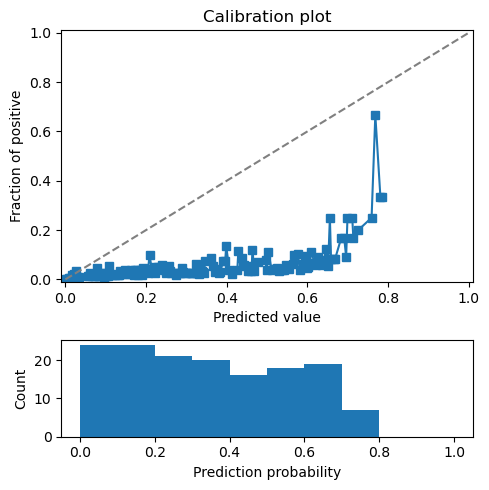

In [582]:
plotter(p2_, y2_)

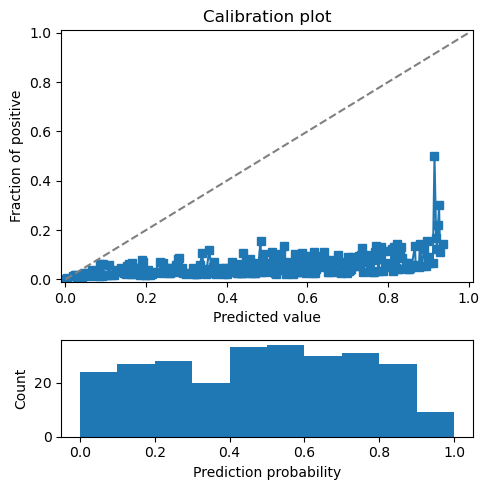

In [583]:
plotter(p1_, y1_)

In [584]:
import sklearn
from sklearn.metrics import confusion_matrix

In [585]:
[sklearn.metrics.roc_auc_score(tgold4,  tp4 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold3,  tp3 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold2,  tp2 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold1,  tp1 , average = 'samples')]


[0.7362584872888047,
 0.7115946860761361,
 0.6758331238741568,
 0.6741808221969504]

In [586]:
( confusion_matrix (tgold1,  cal_1>.5) )

array([[10995,  4592],
       [  224,   247]], dtype=int64)

In [587]:
( confusion_matrix (tgold2,  cal_2>.5) )

array([[12394,  1558],
       [  166,    53]], dtype=int64)

In [588]:
( confusion_matrix (tgold3,  cal_3>.5) )

array([[12123,   463],
       [  141,    12]], dtype=int64)

In [589]:
( confusion_matrix (tgold4,  cal_4>.5) )

array([[10087,   468],
       [   78,    18]], dtype=int64)